<a href="https://colab.research.google.com/github/fstigler/AI_Programming_with_Python_Udacity_Nanodegree-/blob/main/Machine_Learning_S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
!pip install yfinance
!pip install pandas
!pip install numpy

In [189]:
import yfinance as yf
import pandas as pd
import numpy as np

In [281]:
df = yf.download('GOOGL', start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [282]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [283]:
def lagit(df, lags):
  names = []
  for i in range(1,lags +1):
    df['Lag_'+str(i)] = df['returns'].shift(i)
    names.append('Lag_'+str(i))
  return names


In [284]:
lagnames = lagit(df,5)

In [285]:
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [286]:
 df.dropna(inplace=True)

In [287]:
from sklearn.linear_model import LinearRegression

In [288]:
model = LinearRegression()

In [289]:
model.fit(df[lagnames], df['returns'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [290]:
df['prediction_LR'] = model.predict(df[lagnames])

In [291]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR]

In [292]:
df['strat_LR'] = df['direction_LR'] * df['returns']

In [293]:
np.exp(df[['returns', 'strat_LR']].sum())

returns     9.517581
strat_LR    4.593094
dtype: float64

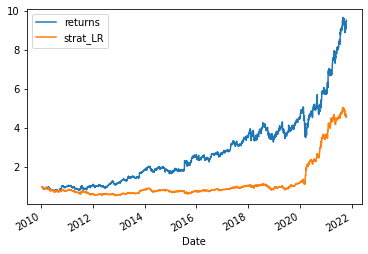

In [294]:
np.exp(df[['returns', 'strat_LR']].cumsum()).plot()

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
train,test = train_test_split(df, shuffle=False,
                              test_size=0.3, random_state=0)  

In [297]:
train = train.copy()

In [298]:
test = test.copy()

In [299]:
model = LinearRegression()

In [300]:
model.fit(train[lagnames], train['returns']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [301]:
test['prediction_LR'] = model.predict(test[lagnames]) 

In [302]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [303]:
test['strat_LR'] = test['direction_LR'] * test ['returns']

In [304]:
np.exp(test[['returns', 'strat_LR']].sum())

returns     2.807027
strat_LR    1.253437
dtype: float64

In [305]:
(test['direction_LR'].diff()!= 0).value_counts()

False    659
True     231
Name: direction_LR, dtype: int64

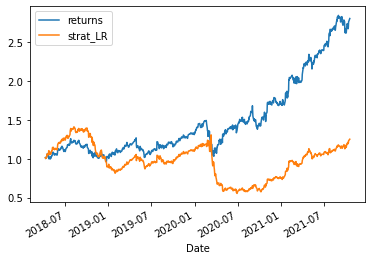

In [306]:
  np.exp(test[['returns', 'strat_LR']].cumsum()).plot()